In [7]:
# data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 15

# machine learning models
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# statistical test
from scipy.stats import ranksums


## Import Data

In [8]:
avi = pd.read_csv('SnowWeatherCleanROS.csv')
avi.head()

,Unnamed: 0,avi_danger,avg_wind,temp_max_swing,temp_max_swing_from_avg,year,month,day,temp_max,temp_min,...,prevailing_wind_E_2,prevailing_wind_N_2,prevailing_wind_NE_2,prevailing_wind_NW_2,prevailing_wind_S_2,prevailing_wind_SE_2,prevailing_wind_SW_2,prevailing_wind_W_2,three_day_snow_2,next_day_avi_danger
0,0,1.0,20.58,0.0,0.0,2010.0,12.0,20.0,15,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2,3.0
1,1,3.0,35.12,3.0,0.0,2010.0,12.0,21.0,18,10,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.3,2.0
2,2,2.0,33.78,-3.0,0.0,2010.0,12.0,22.0,15,7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,3.0
3,3,3.0,31.32,0.0,0.0,2010.0,12.0,23.0,15,6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,2.0
4,4,2.0,32.44,2.0,1.4,2010.0,12.0,24.0,17,9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3,2.0


In [9]:
avi = avi[avi['avi_danger'].notnull()]
x = avi.iloc[:, 0:avi.shape[1]-2]
y = avi.iloc[:, avi.shape[1]-1]

(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)



[[  1. 473.]
 [  2. 473.]
 [  3. 473.]
 [  4. 473.]]


### PCA graph of the danger levels

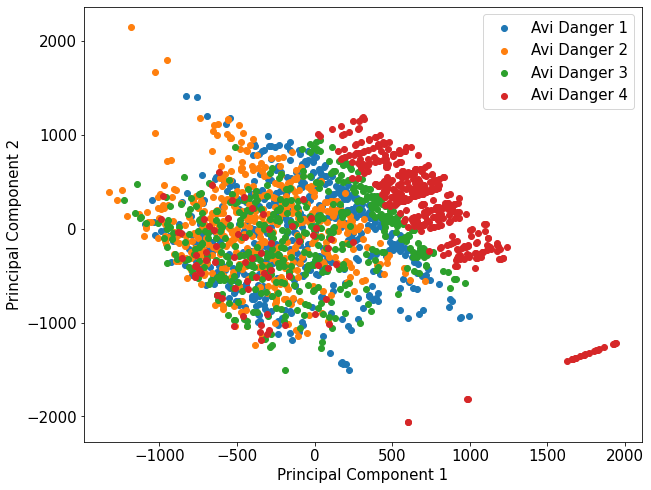

In [10]:

clf = PCA(n_components=2)
transformed_data = clf.fit_transform(x)

#create a scatter plot with different colors for different clases of data-points
class_0 = np.where(y == 1)
class_1 = np.where(y == 2)
class_2 = np.where(y == 3)
class_3 = np.where(y == 4)

# plotting of transformed data by class
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(transformed_data[:, 0][class_0], transformed_data[:, 1][class_0], label = "Avi Danger 1")
plt.scatter(transformed_data[:, 0][class_1], transformed_data[:, 1][class_1], label = "Avi Danger 2")
plt.scatter(transformed_data[:, 0][class_2], transformed_data[:, 1][class_2], label = "Avi Danger 3")
plt.scatter(transformed_data[:, 0][class_3], transformed_data[:, 1][class_3], label = "Avi Danger 4")
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [5]:
# prepare models
models = []
models.append(('Logistic Reg', LogisticRegression(tol = 0.0001, solver = 'newton-cg', penalty = 'l2', C = 100, max_iter = 10000)))
models.append(('Decision Tree', DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 1, max_depth = 110)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 1600, min_samples_split = 10, min_samples_leaf = 2, 
                                                       max_features = 'auto', max_depth = 110, bootstrap = False)))
models.append(('SVM', SVC(kernel = 'rbf', gamma = 0.01, C = 1000)))
models.append(('Gradient Boosting', GradientBoostingClassifier(n_estimators = 250, max_depth = 4, learning_rate = 0.15)))
models.append(('K Nearest Neighbors', KNeighborsClassifier(p = 2, n_neighbors = 3, leaf_size = 46)))
models.append(('Extra Trees', ExtraTreesClassifier(n_estimators = 1600, min_samples_split = 2, min_samples_leaf = 2,
                                                   max_features = 'sqrt', max_depth = 80, bootstrap = False)))


In [6]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/lowell/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lowell/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Logistic Reg: 0.603609 (0.026592)
Decision Tree: 0.696188 (0.087711)
Random Forest: 0.794467 (0.064043)
SVM: 0.727391 (0.146607)
Gradient Boosting: 0.753718 (0.056540)
K Nearest Neighbors: 0.646475 (0.105872)
Extra Trees: 0.804999 (0.053172)


Text(0, 0.5, 'Accuracy')

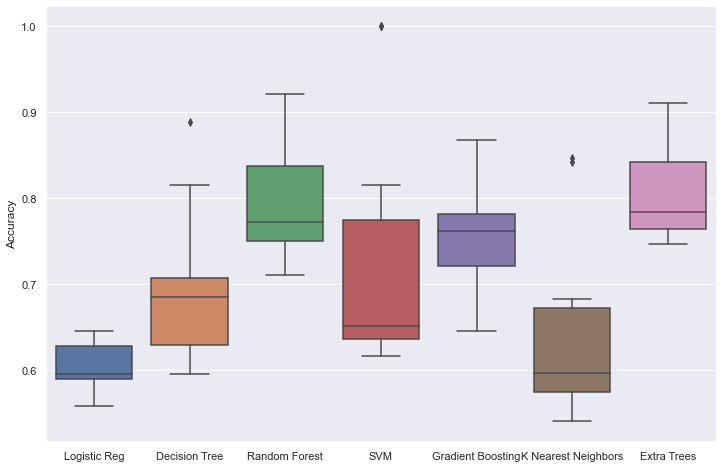

In [7]:
sns.set(font_scale=1)
boxplot = sns.boxplot(data=results)
boxplot.set_xticklabels(names)
plt.ylabel("Accuracy")

In [8]:
uncorrected_pvals = []
comparison_names = []
for i in range(len(results)):
    for j in range(i+1,len(results)):
        print("%20s: %f, %20s: %f, \tp = %f" % (names[i], np.mean(results[i]), 
                                          names[j], np.mean(results[j]),
                                          ranksums(results[i],results[j])[1]))
        uncorrected_pvals.append(ranksums(results[i],results[j])[1])
        comparison_names.append((names[i],names[j]))

        Logistic Reg: 0.603609,        Decision Tree: 0.696188, 	p = 0.005159
        Logistic Reg: 0.603609,        Random Forest: 0.794467, 	p = 0.000157
        Logistic Reg: 0.603609,                  SVM: 0.727391, 	p = 0.002827
        Logistic Reg: 0.603609,    Gradient Boosting: 0.753718, 	p = 0.000183
        Logistic Reg: 0.603609,  K Nearest Neighbors: 0.646475, 	p = 0.677585
        Logistic Reg: 0.603609,          Extra Trees: 0.804999, 	p = 0.000157
       Decision Tree: 0.696188,        Random Forest: 0.794467, 	p = 0.010165
       Decision Tree: 0.696188,                  SVM: 0.727391, 	p = 0.850107
       Decision Tree: 0.696188,    Gradient Boosting: 0.753718, 	p = 0.058782
       Decision Tree: 0.696188,  K Nearest Neighbors: 0.646475, 	p = 0.088973
       Decision Tree: 0.696188,          Extra Trees: 0.804999, 	p = 0.008151
       Random Forest: 0.794467,                  SVM: 0.727391, 	p = 0.082099
       Random Forest: 0.794467,    Gradient Boosting: 0.753718, 

In [9]:
from statsmodels.stats.multitest import multipletests

(significant, corected_pval, _, _) = multipletests(uncorrected_pvals, method='fdr_bh')

for i in range(len(comparison_names)):
    print("%40s: %f \t%s" % (comparison_names[i],corected_pval[i],significant[i]))

       ('Logistic Reg', 'Decision Tree'): 0.021396 	True
       ('Logistic Reg', 'Random Forest'): 0.001279 	True
                 ('Logistic Reg', 'SVM'): 0.014843 	True
   ('Logistic Reg', 'Gradient Boosting'): 0.001279 	True
 ('Logistic Reg', 'K Nearest Neighbors'): 0.711464 	False
         ('Logistic Reg', 'Extra Trees'): 0.001279 	True
      ('Decision Tree', 'Random Forest'): 0.023719 	True
                ('Decision Tree', 'SVM'): 0.850107 	False
  ('Decision Tree', 'Gradient Boosting'): 0.112220 	False
('Decision Tree', 'K Nearest Neighbors'): 0.116777 	False
        ('Decision Tree', 'Extra Trees'): 0.021396 	True
                ('Random Forest', 'SVM'): 0.116777 	False
  ('Random Forest', 'Gradient Boosting'): 0.318542 	False
('Random Forest', 'K Nearest Neighbors'): 0.021396 	True
        ('Random Forest', 'Extra Trees'): 0.659512 	False
            ('SVM', 'Gradient Boosting'): 0.214468 	False
          ('SVM', 'K Nearest Neighbors'): 0.116777 	False
                  ('SV